<a href="https://colab.research.google.com/github/SamuelRodriguez81/Red-neuronal-convolucional-/blob/main/_Proyecto_Final_Equipo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Producto integrador de aprendisaje
Inteligencia artificial y redes neuronales

Equipo 5

Samuel Rodriguez Godinez

Ivann Maglioni Rodriguez

Mark Isacc Alvarez

Edgar Eduardo Garza Lozano

Jesus Arquieta Maldonado


https://github.com/SamuelRodriguez81/Red-neuronal-convolucional-

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np
from tensorflow.keras import Sequential as sequential





---



In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/IA/casting_data/casting_data/test',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(300,300))

Found 715 files belonging to 2 classes.
Using 572 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/IA/casting_data/casting_data/test',
  validation_split=0.2,
  subset="validation",
  seed=200,
  image_size=(300,300))

Found 715 files belonging to 2 classes.
Using 143 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)



['def_front', 'ok_front']


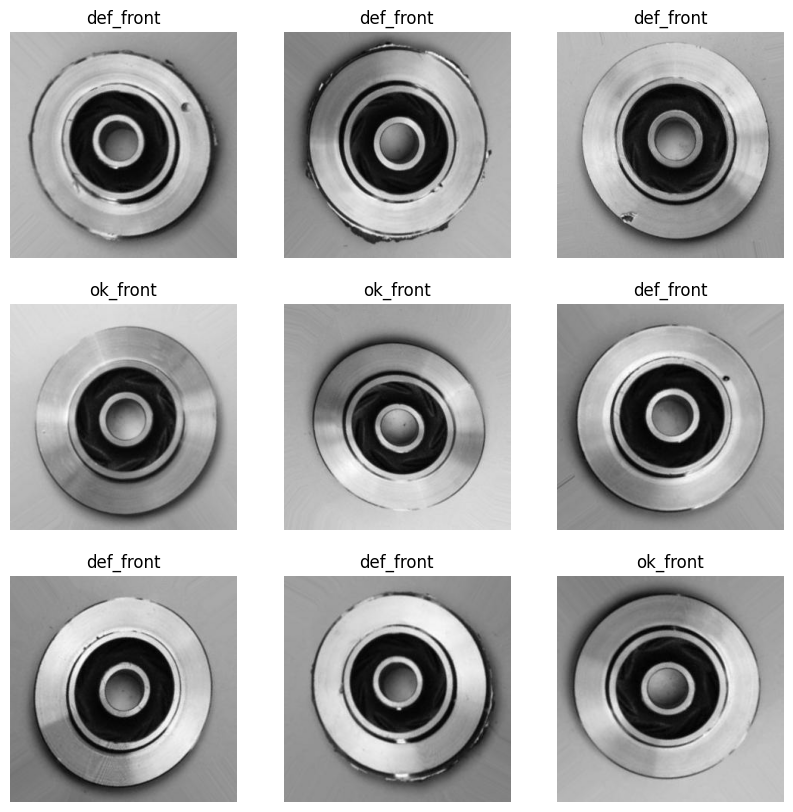

In [ ]:
import matplotlib.pyplot as plt # Importar la librería de matplolib para gráficas

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 300, 300, 3)
(32,)


In [ ]:
from tensorflow.keras import Sequential as sequential
num_classes = len(class_names)
model = sequential([
  layers.Rescaling(1./255, input_shape=(300, 300, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)       

In [ ]:
epochs=4
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/4
18/18 [==============================] - 78s 4s/step - loss: 1.4396 - accuracy: 0.5577 - val_loss: 0.6444 - val_accuracy: 0.6853
Epoch 2/4
18/18 [==============================] - 79s 4s/step - loss: 0.6567 - accuracy: 0.6259 - val_loss: 0.5900 - val_accuracy: 0.6853
Epoch 3/4
18/18 [==============================] - 70s 4s/step - loss: 0.6004 - accuracy: 0.6643 - val_loss: 0.4500 - val_accuracy: 0.8741
Epoch 4/4
18/18 [==============================] - 68s 4s/step - loss: 0.5138 - accuracy: 0.7605 - val_loss: 0.3525 - val_accuracy: 0.8322


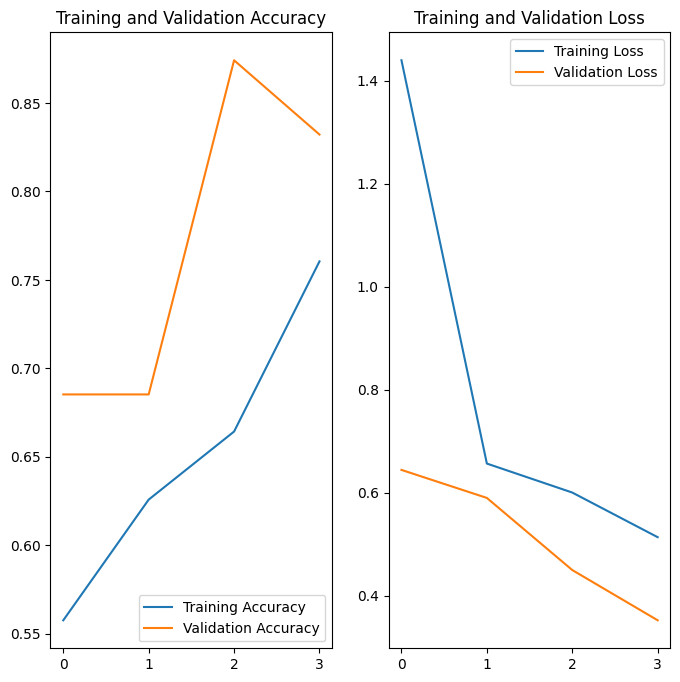

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/IA/casting_data/casting_data/test',
  seed=123,
  image_size=(300,300))

Found 715 files belonging to 2 classes.


In [ ]:
model.evaluate(test_ds,return_dict=True)

23/23 [==============================] - 32s 1s/step - loss: 0.4957 - accuracy: 0.7776


{'loss': 0.49574795365333557, 'accuracy': 0.777622401714325}

In [ ]:
image_path = '/content/drive/MyDrive/IA/casting_data/casting_data/test/def_front/cast_def_0_1059.jpeg'
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 [==============================] - 0s 206ms/step


In [ ]:
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Esta imagen parece ser def_front con un 75.13 % de exactitud.
